In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.interpolate as sci

random.seed(12111842)

lo = -1
hi = 1
npoints = 10

# Prepare noisy 2d-data.
x = np.linspace(lo, hi, npoints)
y = np.linspace(lo, hi, npoints)
xg, yg = np.meshgrid(x, y)
z = np.exp(-xg**2 - yg**2)
noise = 0.1 * np.random.normal(0, 1, npoints**2)
noise = np.reshape(noise, (npoints, npoints))
z = z + noise

nknots = 50
xs = np.linspace(lo + 0.25, hi - 0.25, nknots)
ys = np.linspace(lo + 0.25, hi - 0.25, nknots)

fit = sci.LSQBivariateSpline(xg.ravel(), yg.ravel(), z.ravel(), tx = xs, ty = ys, kx = 3, ky = 3)

xgs, ygs = np.meshgrid(xs, ys)
zs = fit.ev(xgs.ravel(), ygs.ravel())

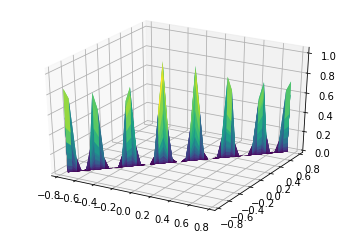

In [33]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.plot_surface(xs, ys, np.reshape(zs, (nknots, nknots)), cmap = 'viridis', edgecolor = 'none')
plt.show()

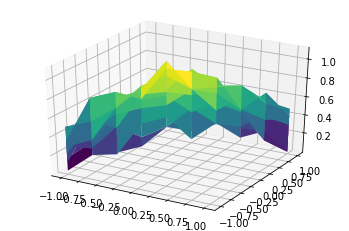

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.plot_surface(x, y, z, cmap = 'viridis', edgecolor = 'none')
plt.show()
